# Age and Gender Prediction


<a name="Introduction"></a>
[INTRODUCTION](#Introduction)

The goal of this project is to create an **Age-Gender Predictor**. It was inspired by the [Age and Gender Classification Dataset of the Open University of Israel (Face Image Project)](http://www.openu.ac.il/home/hassner/projects/cnn_agegender/CNN_AgeGenderEstimation.pdf).
The intended goal of the project is to generate age gender on unseen face images.

The "Age and gender classification using convolutional neural networks" is a research paper related to the dataset above providing separately age or gender labels.


The main challenges are:
- **1- Find an age and gender labeled dataset to train our implementations :** Find dozen of face images from the internet with their correct age and gender is easy. But when you talk about several thousands of images, ***the task is very hard and expensive***. So, during our research we coincidently found the free ***Age and Gender Classification Dataset of the Open University of Israel (Face Image Project)*** which as 8 classes of age instead of 6 as in the original paper. ***A lot of thanks to them.***
- **2- Transform the dataset to reach our goals :** The Age and Gender Classification Dataset has some very good implementations in Tensorflow for Data preparation and tests. But they have a different goal, their implementation only performs seperate prediction of genders and ages. The goal here is to produce both prediction on each face image and try to outperform the accuracy. So, we should rewrite our own functions to reach our goals, using their annotations for the provided dataset. We need to match separate age and gender with their corresponding image ID and implement the prediction model.
- **3- Try our implementation on video and mobile app (Optional) :** It is not too hard to label pictures in video when we don't have to simultaneously deal with the audio too. But we could have some surprises sometime because of frameworks dependencies. Moreover, at this time (April 2017) we don't have enough ressources about the transformation process of Deep learning Frameworks projects into mobile apps. Run a Deep learning code in a notebook implementation and run it as mobile app are very different. Each framework has its constraints, no universal methods for this (crossplatform iOS-Android-Windows Mobile, several frameworks, etc.). 

The main steps of implementation are:
- **1- Data preparation :** create a dictionary of age and gender including all training set images
- **2- One-hot labels :** create a dictionary of age and gender including all training set images
- **3- Age and Gender Prediction :** create an ANN and train it with the prepared data to predict age and gender.
- **4- Mobile app implementation :** 

## Requirements
In the **import section** you will find all the required frameworks for the code to work. We mainly work with :

- **Tensorflow** and its advanced API **Tflearn**.
- **Python 2.x** and **Python 3.x** branches (You could run the notebook code where you want)


Below the Table of contents. We try to be as clear as possible for pedagogical reasons, so that newbies could also get what they need.
<a name="Table_of_Contents"></a>
# Table of Contents
- [Introduction](#Introduction)

- [I- Data Preparation](#Data_Preparation)
    - [I.1- Fondamental functions for data preparation](#Fondamental_functions)
    - [I.2- The One-Hot Labels](#One_Hot_Labels)
      - [I.2.1- The One-Hot Labels definition](#One_Hot_Labels_definition)
      - [I.2.2- The One-Hot Labels creation for all features](#One_Hot_Labels_creation)
    - [I.3- Datasets Transformation into lists](#Datasets_Transformation)
    - [I.4- Training and Test sets creation](#Training_Test_Sets_Creation)


- [II- Age and Gender Prediction](#Age_Gender_Prediction)
    - [II.1- Build the Artificial Neural Network (ANN) Model](#ANN_Model)
      - [II.1.1- With TFLearn](#ANN_Model_TFlearn)
      - [II.1.2- With Tensorflow](#ANN_Model_Tensorflow)

    - [II.2- Models Evaluation](#Model_Evaluation)
      - [II.2.1- With TFLearn](#Model_Evaluation_TFlearn)
      - [II.2.2- With Tensorflow](#Model_Evaluation_Tensorflow)

    - [II.3- Prediction on the Models](#Model_Prediction)
      - [II.3.1- With TFLearn](#Model_Prediction_TFlearn)
        - [II.3.1.1- With images from the dataset](#prediction_on_dataset_TFlearn)
        - [II.3.1.2- With other face images](#prediction_on_otherFaces_TFlearn)
        - [II.3.1.3- With non-faces images](#prediction_on_NonFaces_TFlearn)
      - [II.3.2- With Tensorflow](#Model_Prediction_Tensorflow)
        - [II.3.2.1- With images from the dataset](#prediction_on_dataset_Tensorflow)
        - [II.3.2.2- With other face images](#prediction_on_otherFaces_Tensorflow)
        - [II.3.2.3- With non-faces images](#prediction_on_NonFaces_Tensorflow)

    - [II.4- Improvement](#Improvement)
      - [II.4.1- With TFLearn](#Improvement_TFlearn)
          - (Hyperparameter tuning and prediction)
      - [II.4.2- With Tensorflow](#Improvement_Tensorflow)
          - (Hyperparameter tuning and prediction)
 
 
- [III- Age and Gender Application (Optional)](#Age_Gender_Application)
    - Resources for Desktop, Mobile and Web Application     
    
    
- [IV- Discussion](#Discussion)
    - Improvement
    - Framework limitation
    - Future work


- [CONCLUSION](#Conclusion)
    - Tools of the MLND used in the capstone Age and Gender Prediction implementation.


- [VI- References](#References)
      - https://www.tensorflow.org
      - http://tflearn.org
      - https://keras.io



In [1]:
# Import all the required libraries
from __future__ import print_function
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np
import tensorflow as tf
import tflearn
import data
import os
import sys
import tarfile
from IPython.display import display, Image
from scipy import ndimage
from scipy.misc import imresize
from sklearn.linear_model import LogisticRegression
from six.moves.urllib.request import urlretrieve
from six.moves import cPickle as pickle

# Config the matplotlib backend as plotting inline in IPython
%matplotlib inline

print("tf.__version__ : ", tf.__version__)
print("python --version : ", sys.version)
#print("tflearn --version : ", tflearn.__version__)
PyVersion = sys.version

tf.__version__ :  1.1.0
python --version :  2.7.6 (default, Oct 26 2016, 20:30:19) 
[GCC 4.8.4]


<a name="Data_Preparation"></a>
# I- Data preparation
<a name="Fondamental_functions"></a>
## I.1- Fondamental functions for data preparation

- Using the differents training set files 

The goal is to create all the necessary functions to link each image to its gender and age, such as *age_gender_per_image*).
    
    To do it we will use the files in [./AgeGenderDeepLearning/Folds/train_val_txt_files_per_fold] directory. In each fold we have these files : {age_test.txt, age_train.txt, age_train_subset.txt, age_val.txt, gender_test.txt, gender_train.txt, gender_train_subset.txt, gender_val.txt}.
* The functions will mainly keep images ids in dictionaries of age and gender. For example : ***age_gender_dic = {"id_image":(age_class, gender)}***

    <font color='red'>Note: Here we do not work on the dataset itself directly. But we only use the images' names saved in the files.<br\>For the ***images_root_directory = '/notebooks/faces'*** test purposes below, consider that ***/notebooks/*** is the ipython notebook repository when runing it on your own system; and update if necessary.</font>

In [2]:
# THE FOLDS PATH : TRAINING, VALIDATION AND TEST FOLDS
print("PyVersion[0] : '{}'".format(PyVersion[0]))

if int(PyVersion[0])==2:
    folds_path='/notebooks/AgeGenderDeepLearning/Folds/train_val_txt_files_per_fold' 
    print("Jean-Claude, I got in python 2")
else:
    folds_path='C:\\Users\\Jean-Claude KOUASSI\\tensorflow-udacity\\AgeGenderDeepLearning\\Folds\\train_val_txt_files_per_fold'
    print("Jean-Claude, I got in python 3")


PyVersion[0] : '2'
Jean-Claude, I got in python 2


In [3]:
# TESTED WITH SUCCESS ON THE 1Go faces Dataset


def is_image_in_gender_dic(image_id):
    # Verify if an image is in gender_dictionary and return true or false
    # Just to make the age_gender_dic function aesthetic
    if image_id in gender_dic:
        return 1
    else:
        return 0
    
def is_image_in_age_dic(image_id):
    # Verify if an image is in age_dictionary and return true or false
    # Just to make the age_gender_dic function aesthetic
    if image_id in age_dic:
        return 1
    else:
        return 0

    
def python3_image_id(image_id):
    # Let's get the image_id with python 3
    image_ids = image_id.split('/')
    i=1
    image_id2 = ''
    for elt in image_ids:
        if i<len(image_ids):
            image_id2 += elt+'\\'
            i=i+1
        else:
            image_id2 += elt
            i=i+1
            
    return image_id2

def get_image_from_directory(images_root_directory, image_id):
    # The goal of this function is to return an image with its full path name.
    # Useful for transformation process.
    
    # Get the image directory from its id
    if int(PyVersion[0])==2:
        image_directory = image_id.split('/')[0]
        image_directory=os.path.join(images_root_directory,image_directory)
        image_directory_files_names = os.listdir(image_directory)
    else:
        image_directory = image_id.split('\\')[0]
        image_directory=os.path.join(images_root_directory,image_directory)
        image_directory_files_names = os.listdir(image_directory)
    #print("image_directory in get_image_from_directory :\n {} \n".format(image_directory))

    #print("image_directory_files_names in get_image_from_directory :\n {} \n".format(image_directory_files_names))
    
    # Get the image itself in a variable with its full path,
    # so that we could directly apply any image function on
    # We save the part of the image name which is unique, in image_id_in_fold 
    image_id_in_fold = image_id.split('.')[1]
    image_id_in_fold = image_id_in_fold + '.' + image_id.split('.')[2]
    #print("image_id_in_fold in get_image_from_directory :\n {} \n".format(image_id_in_fold))
    
    # We only select images files (.jpg), according to the Adience benchmark
    image_name = [image_file for image_file in image_directory_files_names if image_id_in_fold in image_file 
                  and '.jpg' in image_file]

    
    # Get now the image full path name
    image = os.path.join(image_directory,image_name[0])
    
    return image
    



def age_gender_per_image(folds_path, images_root_directory):
    # Extract all files content in a list.
    #folds_path='/notebooks/AgeGenderDeepLearning/Folds/train_val_txt_files_per_fold'
    files_root_dir=folds_path # txt files directory
    all_images_list = [] 
    gender = [] 
    age = []
    #current_test_files_names = []
    age_gender_dic = {}
    gender_dic = {}
    age_dic = {}
    
    
    # Loop all the folds in the main directory
    # This will give two lists of images : gender (each image with its gender) and age (each image with its age)
    for current_test_fold_ind in range(5):
        current_fold_name='test_fold_is_{0}'.format(current_test_fold_ind)
        current_fold_name=os.path.join(files_root_dir,current_fold_name)
        #print("TEST current_fold_name : ", current_fold_name)
        
        
        # Read and save the test files names in a variable
        
        #current_test_files_names = os.listdir(current_fold_name)
        if int(PyVersion[0])==2:
            current_test_files_names = os.listdir(current_fold_name)
            #print("TEST current_test_files_names : ", current_test_files_names)
        elif int(PyVersion[0])==3:
            current_test_files_names = os.listdir(os.path.abspath(current_fold_name))
            #print("TEST current_test_files_names : ", current_test_files_names)
            
        # Loop over the files names from the variable
        # and for each file, read it and save the content in a variable of images names
        # Save the gender files content in [gender] and the age files content in [age]
        for file_name in current_test_files_names:
            current_file_txt = os.path.join(current_fold_name,file_name)
            # Read the current_file_txt content and save it according to its type (gender or age file)
            
            # If it is a age file txt 
            if 'age' in file_name:
                # Read the current_file_txt content
                with open(current_file_txt) as f:
                    current_file_txt_content=f.readlines()
                    
                # Save the content in age list    
                for elt in current_file_txt_content:
                    elt=elt.split('\r\n')[0]
                    age.append(elt)
                    image_name=elt.split(' ')[0]
                    age_class=elt.split(' ')[1]
                    age_dic[image_name]=age_class
                    
                    # Add the image in the list of all images
                    if image_name not in all_images_list:
                        all_images_list.append(image_name)
                    
            
            # If it is a gender file txt    
            if 'gender' in file_name:
                # Read the current_file_txt content
                with open(current_file_txt) as f:
                    current_file_txt_content=f.readlines()
                    
                # Save the content in age list    
                for elt in current_file_txt_content:
                    elt=elt.split('\r\n')[0]
                    gender.append(elt)
                    image_name=elt.split(' ')[0]
                    gender_digit=elt.split(' ')[1]
                    gender_dic[image_name]=gender_digit
                    
                    # Add the image in the list of all images
                    if image_name not in all_images_list:
                        all_images_list.append(image_name)
    
    
    ### NOW age and gender dictionaries are filled and all images are saved in one dictionary
    # So we are ready to create the age_gender_dic
    
    # Fill the age_gender_dic
    for image_id in all_images_list:
        # Verify that image_id is in both
        if image_id in gender_dic and image_id in age_dic:
            # Add it to the age_gender_dic
            if int(PyVersion[0])==2:
                image_full_path_name = get_image_from_directory(images_root_directory, image_id)
                age_gender_dic[image_full_path_name] = (age_dic[image_id], gender_dic[image_id])
            elif int(PyVersion[0])==3:
                image_full_path_name = get_image_from_directory(images_root_directory, image_id)
                age_gender_dic[image_full_path_name] = (age_dic[image_id], gender_dic[image_id])
    
    
    
    # Test with the get_image_from_directory  aligned
    ### FOR TEST PURPOSES ONLY, if you don't want to display, put it in comment.
    if int(PyVersion[0])==2:
        image_id = '28754132@N06/landmark_aligned_face.610.11612814564_0fa84cd8bb_o.jpg'
        image_full_path_name = get_image_from_directory(images_root_directory, image_id)
        print("(sample of) image_full_path_name :\n{} \n\n".format(image_full_path_name))
    elif int(PyVersion[0])==3:
        image_id = '28754132@N06\\landmark_aligned_face.610.11612814564_0fa84cd8bb_o.jpg'
        image_full_path_name = get_image_from_directory(images_root_directory, image_id)
        print("(sample of) image_full_path_name :\n{} \n\n".format(image_full_path_name))
    
    
    return age_gender_dic




print("\n ************ Test of the age_gender_dic function **************  ")
print("\n ******** ALL STATISTICS ABOUT THE DATA AVAILABLE HERE *********  \n")
# Test of the function
age_gender_dic = {}


if int(PyVersion[0])==2:
    images_root_directory = '/notebooks/faces' # Uncomment and comment the line below to work only with /faces dataset
    #images_root_directory = '/notebooks/aligned' # Uncomment to work only with /aligned dataset
elif int(PyVersion[0])==3:  
    images_root_directory = 'C:\\Users\\Jean-Claude KOUASSI\\tensorflow-udacity\\faces' 
    images_root_directory = 'C:\\Users\\Jean-Claude KOUASSI\\tensorflow-udacity\\aligned'   


age_gender_dic = age_gender_per_image(folds_path, images_root_directory)



print("\n ************ ********* **************  \n")
    
print("age_gender_dic len : {}".format(len(age_gender_dic)))

i = 0
for elt in age_gender_dic:
    if i==0:
        print("age_gender_dic image id : {} \nage_gender_dic classification : {}".format(elt, age_gender_dic[elt]))
        #print("age_gender_dic len (sample): \n", age_gender_dic[elt])
        i=1


 ************ Test of the age_gender_dic function **************  

 ******** ALL STATISTICS ABOUT THE DATA AVAILABLE HERE *********  

(sample of) image_full_path_name :
/notebooks/faces/28754132@N06/coarse_tilt_aligned_face.610.11612814564_0fa84cd8bb_o.jpg 



 ************ ********* **************  

age_gender_dic len : 16156
age_gender_dic image id : /notebooks/faces/37303189@N08/coarse_tilt_aligned_face.84.10631380725_490e665b37_o.jpg 
age_gender_dic classification : ('0', '0')


In [4]:
print(len(age_gender_dic.values()))
age_gender_dic.values()[:12] # A sample of the values list content

16156


[('0', '0'),
 ('0', '1'),
 ('0', '0'),
 ('2', '1'),
 ('2', '1'),
 ('3', '1'),
 ('1', '1'),
 ('1', '1'),
 ('4', '1'),
 ('4', '1'),
 ('4', '1'),
 ('0', '0')]

In [5]:
print("\n ******** Detailed Information about the Unified Dataset Benchmark *********  \n")
"""
Write a script on the Unified Dataset which return
for each age class:
- the number of male
- the number of female
- the total
"""
content_dic = {"Male":0, "Female":0} # Will totalize the content of the Unified_Dataset per class
Unified_Dataset = {"0-2":content_dic, "4-6":content_dic, "8-13":content_dic, "15-20":content_dic, 
                   "25-32":content_dic, "38-43":content_dic, "48-53":content_dic, "60-":content_dic}

def return_age_class_key(id):
    age_class_key_dic = {0:"0-2", 1:"4-6", 2:"8-13", 3:"15-20", 4:"25-32", 5:"38-43", 6:"48-53", 7:"60-"}
    return age_class_key_dic[id]

# Let's test the function
print("return_age_class_key test :", return_age_class_key(7))

# In the Adience Benchmark txt files, male are label with a 0, and female with a 1.
def return_Unified_Dataset_Details(age_gender_dic, Unified_Dataset):
    for value in age_gender_dic.values():
        age_class, gender_class = value
        current_class = return_age_class_key(int(age_class))
        #print("I got value JC : ", value)
        #print("current_class JC : ", current_class)
        if int(gender_class) == 0:
            current_content = Unified_Dataset[current_class]
            current_content_dic = current_content.copy()
            current_male_value = current_content_dic["Male"]
            #print("current_male_value : ", current_male_value)
            current_content_dic["Male"] = int(current_male_value) + 1
            #print("current_male_value After Update : ", current_male_value)
            Unified_Dataset[current_class] = current_content_dic
            current_content_dic = {}
        elif int(gender_class) == 1:
            current_content = Unified_Dataset[current_class]
            current_content_dic = current_content.copy()
            current_female_value = current_content_dic["Female"]
            current_content_dic["Female"] = int(current_female_value) + 1
            Unified_Dataset[current_class] = current_content_dic
            current_content_dic = {}
            
    return Unified_Dataset
            
            
Unified_Dataset_result = return_Unified_Dataset_Details(age_gender_dic, Unified_Dataset)

print("\nUnified Dataset Details :\n", Unified_Dataset_result)

total_number=0
for each_class in Unified_Dataset_result:
    content = Unified_Dataset_result[each_class]
    total_number += int(content['Male'])
    total_number += int(content['Female'])

print("\nTotal number of images : ", total_number)

print("\n ************ ********* **************  \n")


 ******** Detailed Information about the Unified Dataset Benchmark *********  

return_age_class_key test : 60-

Unified Dataset Details :
 {'60-': {'Male': 439, 'Female': 427}, '48-53': {'Male': 392, 'Female': 433}, '4-6': {'Male': 909, 'Female': 1230}, '0-2': {'Male': 716, 'Female': 681}, '15-20': {'Male': 733, 'Female': 907}, '25-32': {'Male': 2304, 'Female': 2575}, '38-43': {'Male': 1239, 'Female': 1054}, '8-13': {'Male': 929, 'Female': 1188}}

Total number of images :  16156

 ************ ********* **************  



<a name="One_Hot_Labels"></a>
## I.2- The One-Hot Labels

<a name="One_Hot_Labels_definition"></a>
### I.2.1- The One-Hot Labels definition
Here, we will see the One-Hot Label presentations and how it works. For pedagogical reason only.

Now that the age and gender function is OK, and return for each image its gender and age, we should use it during the training process. 

Now, we should define a conditonal placeholder (one-hot label) with a size of 10 (8 classes of age and 2 classes of gender). This will allow us to match each image with its label; a one-hot label with the age and gender digit set to 1. 
Here regarding the data structure we cannot use tools such us .... to automatically generate the one-hot label, instead we will hardcode its generation.
Indeed, according to the selected labeled dataset we have two type of classes : 

    ---> age_list = ['(0, 2)','(4, 6)','(8, 12)','(15, 20)','(25, 32)','(38, 43)','(48, 53)','(60, 100)']
    ---> gender_list = ['m','f']

So the one-hot label should have the format below :

    ---> one_hot_label_placeholder = (0,0,0,0,0,0,0,0,0,0)
    ---> one_hot_label_placeholder = (ac1,ac2,ac3,ac4,ac5,ac6,ac7,ac8,gc1,gc2)
    | ac1 = age class 1 | gc1 = gender class 1 |
    
For example for a boy teenager between 8 and 12 will have this one-hot labels : ***(0,0,1,0,0,0,0,0,1,0)***.

In [6]:
print("************** ONE-HOT LABEL USE CASES **************\n")

# One-hot-labels_placeholder
one_hot_label_placeholder = (0, 0, 0, 0, 0, 0, 0, 0, 0, 0) #OR
one_hot_label_placeholder = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

y_dim = 10 # Number of classes
y = tf.placeholder(tf.float32, shape=[None, y_dim])
print("one_hot_label_placeholder with y : ", y)

print("\nOne_hot_label in 1 Dimension :")
y_sample1 = np.zeros(shape=[10])
print(y_sample1)

print("\nOne_hot_label in 2 Dimensions :")
y_sample2 = np.zeros(shape=[5, y_dim])
print(y_sample2)

print("\nAssign value to One_hot_label in 1 Dimension (y_sample1[8] = 1):")
y_sample1[8] = 1
print(y_sample1)

print("\nAssign value to One_hot_label in 2 Dimensions (y_sample2[:,8] = 1):")
y_sample2[:,8] = 1
print(y_sample2)


print("\n")

************** ONE-HOT LABEL USE CASES **************

one_hot_label_placeholder with y :  Tensor("Placeholder:0", shape=(?, 10), dtype=float32)

One_hot_label in 1 Dimension :
[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]

One_hot_label in 2 Dimensions :
[[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]]

Assign value to One_hot_label in 1 Dimension (y_sample1[8] = 1):
[ 0.  0.  0.  0.  0.  0.  0.  0.  1.  0.]

Assign value to One_hot_label in 2 Dimensions (y_sample2[:,8] = 1):
[[ 0.  0.  0.  0.  0.  0.  0.  0.  1.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  1.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  1.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  1.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  1.  0.]]




<a name="One_Hot_Labels_creation"></a>
### I.2.2- The One-Hot Labels creation for all features
Here, using the ***age_gender_dic features*** we will create their corresponding targets or labels; ***the One-Hot Labels***.
The age and gender labels have the one-hot-labels format.


In [7]:
# Train y
def One_Hot_Labels(age_gender_dic_features):
    # Build the train_y dictionary from the train_x one.
    One_Hot_Labels = {}
    
    y_dim = 10
    y_label = np.zeros(shape=[y_dim])
    #y_label[7] = 1
    #print(y_label)
    # gender_list = ['m','f']
    i = 0
    for image_id_with_path in age_gender_dic_features:
        # Get the age and gender values from train_x
        age, gender = age_gender_dic_features[image_id_with_path]
        
        ### FOR TEST PURPOSES ONLY, uncomment during the training process.
        #if i<2:
        #    print("age : {} | gender : {}".format(age, gender))
        #    i +=1
        
        
        # Set the correct y_label according to these values 
        y_label[np.int_(age)] = 1
        if np.int_(gender) == 0:
            y_label[8] = 1
        if np.int_(gender) == 1:
            y_label[9] = 1
        
        # Add the created y_label to the train_y dic, keeping the image id
        One_Hot_Labels[image_id_with_path] = y_label
        
        # reinitialize it for the future label
        y_label = np.zeros(shape=[y_dim])
    
    return One_Hot_Labels

print("\n ************ One_Hot_Labels tests **************  \n")

One_Hot_Labels = One_Hot_Labels(age_gender_dic)

i = 0
for elt in One_Hot_Labels:
    if i<=3:
        print("One_Hot_Labels id : {} | One_Hot_Labels y_label : {}".format(elt, One_Hot_Labels[elt]))
        i +=1
print("\n *****************************************  \n")

print("One_Hot_Labels_dic len : {}".format(len(One_Hot_Labels)))


 ************ One_Hot_Labels tests **************  

One_Hot_Labels id : /notebooks/faces/37303189@N08/coarse_tilt_aligned_face.84.10631380725_490e665b37_o.jpg | One_Hot_Labels y_label : [ 1.  0.  0.  0.  0.  0.  0.  0.  1.  0.]
One_Hot_Labels id : /notebooks/faces/8410632@N03/coarse_tilt_aligned_face.1784.8533455755_6846ef879e_o.jpg | One_Hot_Labels y_label : [ 1.  0.  0.  0.  0.  0.  0.  0.  0.  1.]
One_Hot_Labels id : /notebooks/faces/64504106@N06/coarse_tilt_aligned_face.911.11847753494_26fec82626_o.jpg | One_Hot_Labels y_label : [ 1.  0.  0.  0.  0.  0.  0.  0.  1.  0.]
One_Hot_Labels id : /notebooks/faces/113650443@N02/coarse_tilt_aligned_face.1454.11808709244_587ef951ff_o.jpg | One_Hot_Labels y_label : [ 0.  0.  0.  0.  0.  0.  0.  1.  0.  1.]

 *****************************************  

One_Hot_Labels_dic len : 16156


<a name="Datasets_Transformation"></a>
## I.3- Datasets Transformation into lists

Until here we used dictionaries to facilitate the images and their corresponding labels manipulation. For future use cases, they need to be saved in lists, so that they could be fitted in the models we will use.
Indeed, we will use the ***sklearn.model_selection.train_test_split*** tool to split the dataset into training and test sets. And its allowed inputs are lists, numpy arrays, scipy-sparse matrices or pandas dataframes.

- For each image in the ***age_gender_dic*** dictionary (its key), we will add it in the ***age_gender_feature_list***. 
     * The image key is the full path image name (a string), it should be encoded to be handled by the model. 
     We could do it :
         + Using the **plt.imread(image_name_with_full_path)** function
         + Using the **decode_jpeg** function from data.py (***[rude-carnie/data.py](https://github.com/dpressel/rude-carnie/blob/master/data.py)***) to decode the JPEG string as a 3-D float image Tensor, an RGB JPEG.
         + Using the ***_convert_images*** function from cifar10.py ([Hvass-Labs/TensorFlow-Tutorials/cifar10.py](https://github.com/Hvass-Labs/TensorFlow-Tutorials/blob/master/cifar10.py)) to convert the raw images from the data-files to floating-points.

- For each image in the ***age_gender_dic*** dictionary (its key), we will add its value (***the corresponding label***) in the ***age_gender_label_list***.

Doing so, the model will learn for each image in ***age_gender_feature_list*** its label (the corresponding one-hot label) in ***age_gender_label_list***. And it will be able to predict the labels on unseen images.

In [8]:
## WITH THE WHOLE DATA
"""
print("len train_x dic : {} | len train_y dic : {}".format(len(train_x), len(train_y)))


def train_xy_lists(train_x, train_y):
    # Build the train_y and train_x lists from their corresponding dictionaries.
    train_x_list = []
    train_y_list = []
    
    # Before adding an image in the list, verify that it is in both train_x and train_y dictionaries
    # This to ensure that during the training process each image will have its correct label
    for image in train_x:
        #print("I see the image full path JC ! : ", image)
        # Append the numerical image format using plt.imread(image_name_with_full_path) 
        if image in train_y:
            train_x_list.append(plt.imread(image))
            train_y_list.append(train_y[image])
    #print("IN FUNCTION // train_x : {} | train_y y_label : {}".format(train_x_list[0], train_y_list[0]))
    
    train_x_list = [imresize(img_i, (227, 227)) for img_i in train_x_list]
            
    return train_x_list, train_y_list




print("\n ************ train_xy_lists tests **************  \n")
train_x_list, train_y_list =  train_xy_lists(train_x, train_y)
print("len train_x list : {} | len train_y list : {}".format(len(train_x), len(train_y)))
i=0
for elt in train_x_list:
    if i<=3:
        print("train_x_list : {} | train_y_list y_label : {}".format(train_x_list[i], train_y_list[i]))
        i +=1

print("\n *****************************************  \n\n\n")
"""

'\nprint("len train_x dic : {} | len train_y dic : {}".format(len(train_x), len(train_y)))\n\n\ndef train_xy_lists(train_x, train_y):\n    # Build the train_y and train_x lists from their corresponding dictionaries.\n    train_x_list = []\n    train_y_list = []\n    \n    # Before adding an image in the list, verify that it is in both train_x and train_y dictionaries\n    # This to ensure that during the training process each image will have its correct label\n    for image in train_x:\n        #print("I see the image full path JC ! : ", image)\n        # Append the numerical image format using plt.imread(image_name_with_full_path) \n        if image in train_y:\n            train_x_list.append(plt.imread(image))\n            train_y_list.append(train_y[image])\n    #print("IN FUNCTION // train_x : {} | train_y y_label : {}".format(train_x_list[0], train_y_list[0]))\n    \n    train_x_list = [imresize(img_i, (227, 227)) for img_i in train_x_list]\n            \n    return train_x_list,

IN CASE OF MEMORY ISSUE
<font color='red'>Note: Run this cell only for test or in case of memory issue.<br/>To work on the whole dataset, use the cell above.</font>

len age_gender_dic dic : 16156 | len One_Hot_Labels dic : 16156

 ************ age_gender_xy_lists tests **************  

len age_gender_feature_list : 500 | len age_gender_label_list : 500
age_gender_feature_list : [[0 0 0]
 [0 0 0]] | 
age_gender_feature_list Image : AxesImage(54,36;334.8x217.44) | 
age_gender_label_list y_label : [ 1.  0.  0.  0.  0.  0.  0.  0.  1.  0.]
age_gender_feature_list image Shape : (227, 227, 3)

 *****************************************  





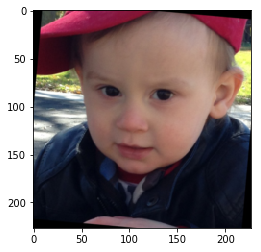

In [9]:
## FOR A PART OF THE DATA, IN CASE OF MEMORY ISSUE
print("len age_gender_dic dic : {} | len One_Hot_Labels dic : {}".format(len(age_gender_dic), len(One_Hot_Labels)))

number_of_sample = 500
def age_gender_xy_lists(age_gender_dic, One_Hot_Labels):
    # Build the train_y and train_x lists from their corresponding dictionaries.
    age_gender_feature_list = []
    age_gender_label_list = []
    
    # Before adding an image in the list, verify that it is in both train_x and train_y dictionaries
    # This to ensure that during the training process each image will have its correct label
    i=0
    for image_full_path in age_gender_dic:
        #print("I see the image full path JC ! : ", image)
        # Append the numerical image format using plt.imread(image_name_with_full_path) 
        if image_full_path in One_Hot_Labels and i<number_of_sample: 
            image = plt.imread(image_full_path)

            age_gender_feature_list.append(image)
            age_gender_label_list.append(One_Hot_Labels[image_full_path])
            i +=1
    #print("IN FUNCTION // train_x : {} | train_y y_label : {}".format(train_x_list[0], train_y_list[0]))
    # Then resize the square image to 227 x 227 pixels
    age_gender_feature_list = [imresize(img_i, (227, 227)) for img_i in age_gender_feature_list]

            
    return age_gender_feature_list, age_gender_label_list




print("\n ************ age_gender_xy_lists tests **************  \n")
age_gender_feature_list, age_gender_label_list =  age_gender_xy_lists(age_gender_dic, One_Hot_Labels)
print("len age_gender_feature_list : {} | len age_gender_label_list : {}".format(len(age_gender_feature_list), len(age_gender_label_list)))
i=0
for elt in age_gender_feature_list:
    if i<=0:
        print("age_gender_feature_list : {} | \nage_gender_feature_list Image : {} | \nage_gender_label_list y_label : {}".format(age_gender_feature_list[i][1,:2], plt.imshow(age_gender_feature_list[i]), age_gender_label_list[i]))
        print("age_gender_feature_list image Shape :", elt.shape)
        i +=1

print("\n *****************************************  \n\n\n")

<a name="Training_Test_Sets_Creation"></a>
## I.4- Training and Test sets creation
Now, we will use the ***sklearn.model_selection.train_test_split*** tool to split the dataset into training and test sets.

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(age_gender_feature_list, age_gender_label_list, 
                                                    test_size=0.33, random_state=42)

In [12]:
print ("len X_train: {}, len X_test: {}, len y_train: {}, len y_test: {}".format(len(X_train), len(X_test), 
                                                                                 len(y_train), len(y_test)))

len X_train: 335, len X_test: 165, len y_train: 335, len y_test: 165


<a name="Age_Gender_Prediction"></a>
# II- Age and Gender Prediction


the model will learn for each image in ***age_gender_feature_list*** its label (the corresponding one-hot label) in ***age_gender_label_list***. And it will be able to predict the labels on unseen images.


In this part, we will pass the time training an artificial neural network model to learn how to predict age and gender of unseen images. For this purposes, we will use the **X_train** and **y_train** we previously built. 
The model will learn for each image in ***X_train*** its label (the corresponding one-hot label) in ***y_train***. And so, it will be able to predict the labels on unseen images. It will generate a one-hot label of 10 dimensions. So, according to the value we will know the age and gender of the image.

- This step will be useful for the mobile App. For each image the app should give its gender and age, and then propose the user to chose a class for aging process on the same image.

<font color='red'><br/>Note: <br/>Here, remember that a model which works well could need **several days on a modern GPU to be trained**.<br/>So **it could take a long time to train a good model, moreover on CPU systems.**<br/>Because of this, we will save the training model for futur use.</font>

<a name="ANN_Model"></a>
## II.1- Build the Artificial Neural Network (ANN) Model
<a name="ANN_Model_TFlearn"></a>
### II.1.1- With TFLearn

In [13]:
os.getcwd()
print("Current path: ", os.getcwd())

Current path:  /notebooks/tensorflow/tensorflow/examples/udacity


In [14]:
print("\n ************ START Build Artificial neural network Model With TFLearn **************  \n")
# Build neural network
net = tflearn.input_data(shape=[None, 227, 227, 3])

net = tflearn.fully_connected(net, 64)
net = tflearn.fully_connected(net, 32)
net = tflearn.fully_connected(net, 32)
net = tflearn.fully_connected(net, 16)
net = tflearn.fully_connected(net, 16)
net = tflearn.fully_connected(net, 10, activation='softmax')

net = tflearn.regression(net, optimizer='adam', loss='categorical_crossentropy')

# Define model and setup tensorboard
tflearn_model = tflearn.DNN(net, tensorboard_dir='output/tflearn_logs', tensorboard_verbose=3)

# Start training (apply gradient descent algorithm)
print("len train_x : {} | len train_y : {}".format(len(X_train), len(y_train)))
tflearn_model.fit(X_train, y_train, n_epoch=20, batch_size=16, show_metric=True)

print("\n ************ END Build Artificial neural network Model With TFLearn **************  \n")

Training Step: 419  | total loss: 3.09886 | time: 29.300s
| Adam | epoch: 020 | loss: 3.09886 - acc: 0.1799 -- iter: 320/335
Training Step: 420  | total loss: 3.12618 | time: 30.730s
| Adam | epoch: 020 | loss: 3.12618 - acc: 0.1681 -- iter: 335/335
--

 ************ END Build Artificial neural network Model With TFLearn **************  



EXECUTE THIS TO SAVE THE MODEL

In [15]:
### MODEL BACKUP
tflearn_model.save('output/model.tflearn.onehot')

INFO:tensorflow:/notebooks/tensorflow/tensorflow/examples/udacity/output/model.tflearn.onehot is not in all_model_checkpoint_paths. Manually adding it.


<a name="ANN_Model_Tensorflow"></a>
### II.1.2- With Tensorflow

In [ ]:
#print(X_train[:1])

In [17]:
print("\n ************ START Build Artificial neural network Model With Tensorflow **************  \n")
### Here we will use tensorflow keras model, it accepts list and numpy arrays as tflearn
from tensorflow.contrib.keras.python.keras.layers.core import *
from tensorflow.contrib.keras.python.keras.models import Sequential
from tensorflow.contrib.keras.python.keras.models import Model


# This returns a tensor
inputs = tf.contrib.keras.layers.Input(shape=(154587,))

# a layer instance is callable on a tensor, and returns a tensor
x = Dense(64)(inputs)
x = Dense(32)(x)
x = Dense(32)(x)
x = Dense(16)(x)
x = Dense(16)(x)
predictions = Dense(10, activation='softmax')(x)

# This creates a model that includes
# the Input layer and three Dense layers
tf_model = Model(inputs=inputs, outputs=predictions)
tf_model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Reshape it to map the content to the rest of the process
X_train = np.array(X_train)
X_train = np.reshape(X_train, (X_train.shape[0], 154587))
y_train = np.array(y_train)
print(y_train.shape)
y_train_new = y_train.copy()

print(y_train_new.shape)
history = tf_model.fit(X_train, y_train_new, epochs=20, validation_split=0.1, batch_size=16, verbose=0)  # starts training
#history = model.fit(X, Y, validation_split=0.33, epochs=150, batch_size=10, verbose=0)

print("\n ************ END Build Artificial neural network Model With Tensorflow **************  \n")


 ************ START Build Artificial neural network Model With Tensorflow **************  

(335, 10)
(335, 10)

 ************ END Build Artificial neural network Model With Tensorflow **************  



In [18]:
### MODEL BACKUP
filepath = 'output/model.tensorflow.onehot'
tf.contrib.keras.models.save_model(tf_model, filepath)

<a name="Model_Evaluation"></a>
## II.2- Models Evaluation
The Metrics used for Models Evaluation here are **loss and accuracy on the test set**.
We will also when possible print a visualization for a better understanding.

<a name="Model_Evaluation_TFlearn"></a>
### II.2.1- With TFLearn

In [ ]:
### Run the command below in a terminal of the server where this notebook is executed 
### and see the result at http://192.168.99.100:6006/
#cd tensorflow/tensorflow/examples/udacity/
#tensorboard --logdir='tflearn_logs'

X_test = np.array(X_test)
y_test = np.array(y_test)
score = tflearn_model.evaluate(X_test, y_test, batch_size=128)
print(score)

<a name="Model_Evaluation_Tensorflow"></a>
### II.2.2- With Tensorflow

In [20]:
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], 154587))
y_test = np.array(y_test)

score = tf_model.evaluate(X_test, y_test, batch_size=128)

165/165 [==============================] - 10s    


In [21]:
print(score)

[29.69637714732777, 0.15757575874978846]


['acc', 'loss', 'val_acc', 'val_loss']


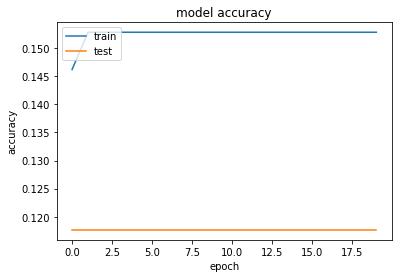

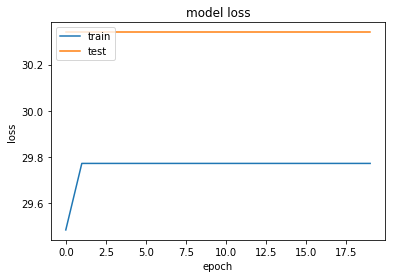

In [24]:
# Visualize training history
# http://machinelearningmastery.com/display-deep-learning-model-training-history-in-keras/
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

<a name="Model_Prediction"></a>
## II.3- Prediction on the Models
<a name="Model_Prediction_TFlearn"></a>
### II.3.1- With TFLearn
<a name="prediction_on_dataset_TFlearn"></a>
#### II.3.1.1- With images from the dataset

In [25]:
print("\n\n ************ START Model Prediction with TFLearn **************  \n")
images_to_plot = []

print("==============> WITH THE test dataset")
# Reshape for the plot function
image_to_predict = (X_test[0])[np.newaxis]
image_to_predict = np.reshape(image_to_predict, (227, 227, 3))

images_to_plot.append(image_to_predict)

# Reshape for the prediction model
image_to_predict = (image_to_predict)[np.newaxis]
print("test dataset image shape : ", image_to_predict.shape)
print("Label Prediction on the test dataset image : ", tflearn_model.predict(image_to_predict))
print("True Label Value : ", y_test[0])


for elt in images_to_plot:
    print("Images shapes for plot :")
    print(elt.shape) 




 ************ START Model Prediction with TFLearn **************  

==============> WITH THE test dataset
test dataset image shape :  (1, 227, 227, 3)
Label Prediction on the test dataset image :  [[0.033298518508672714, 0.016400359570980072, 0.0028568641282618046, 0.1130245178937912, 0.1729286164045334, 0.06957981735467911, 0.001848298474214971, 0.008204993791878223, 0.5561426877975464, 0.025715259835124016]]
True Label Value :  [ 1.  0.  0.  0.  0.  0.  0.  0.  0.  1.]
Images shapes for plot :
(227, 227, 3)


<a name="prediction_on_otherFaces_TFlearn"></a>
#### II.3.1.2- With other face images

In [26]:
print("\n==============> WITH my own image")
# Prediction with my own image

if int(PyVersion[0])==2:
    data_dir_jc_photo = '/notebooks/Kouassi-Jean-Claude-ID.png'
elif int(PyVersion[0])==3:
    data_dir_jc_photo = 'C:\\Users\\Jean-Claude KOUASSI\\tensorflow-udacity\\Kouassi-Jean-Claude-ID.png'

# Reshape for the plot function                
jc_image = plt.imread(data_dir_jc_photo)
jc_image = imresize(jc_image, (227, 227))
images_to_plot.append(jc_image)

# Reshape for the prediction model
jc_image = jc_image[np.newaxis]
jc_image = jc_image[:, :, :, :3]
print("jc_image shape : ", jc_image.shape)
print("Label Prediction with JC Photo: ", tflearn_model.predict(jc_image))
print("True Label Value : [[0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0]]")



==============> WITH my own image
jc_image shape :  (1, 227, 227, 3)
Label Prediction with JC Photo:  [[0.0035695673432201147, 0.0019054501317441463, 0.00025440152967348695, 0.09466402977705002, 0.30045026540756226, 0.11389563232660294, 4.5970900828251615e-05, 0.0002598626015242189, 0.4742927849292755, 0.01066206768155098]]
True Label Value : [[0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0]]


<a name="prediction_on_NonFaces_TFlearn"></a>
#### II.3.1.3- With non-faces images


==============> WITH a non-face image
other_image shape :  (1, 227, 227, 3)
Label Prediction with another image:  [[0.005193926393985748, 0.0042251418344676495, 0.0020345235243439674, 0.09801390767097473, 0.33752110600471497, 0.08542485535144806, 0.0007573777111247182, 0.0019207872683182359, 0.44061118364334106, 0.024297144263982773]]
True Label Value : Here we have a picture of fishes
len images_to_plot : 3
Images shapes for plot :
(227, 227, 3)
Images shapes for plot :
(227, 227, 4)
Images shapes for plot :
(227, 227, 3)

 ************ END Model Prediction with TFLearn**************  



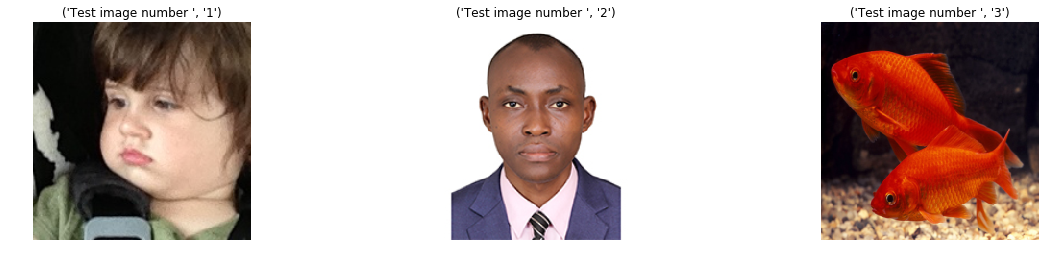

In [27]:
print("\n==============> WITH a non-face image")
# Prediction on unsuitable image (several faces, or animals)
if int(PyVersion[0])==2:
    data_dir_other = '/notebooks/Fish.JPEG'
elif int(PyVersion[0])==3:
    data_dir_other = 'C:\\Users\\Jean-Claude KOUASSI\\tensorflow-udacity\\Fish.JPEG'

# Reshape for the plot function 
other_image = plt.imread(data_dir_other)
other_image = imresize(other_image, (227, 227))
images_to_plot.append(other_image)

# Reshape for the prediction model
other_image = other_image[np.newaxis]
print("other_image shape : ", other_image.shape)
print("Label Prediction with another image: ", tflearn_model.predict(other_image))
print("True Label Value : Here we have a picture of fishes")

print("len images_to_plot :", len(images_to_plot))

for elt in images_to_plot:
    print("Images shapes for plot :")
    print(elt.shape) 

fig, axs = plt.subplots(1, len(images_to_plot), figsize=(20, 4))
for i, ax_i in enumerate(axs):
    NewTitle = "Test image number ", str(i+1)
    ax_i.imshow(images_to_plot[i])
    ax_i.set_title(NewTitle)
    ax_i.grid('off')
    ax_i.axis('off')
    
print("\n ************ END Model Prediction with TFLearn**************  \n")


<a name="Model_Prediction_Tensorflow"></a>
### II.3.2- With Tensorflow 

<a name="prediction_on_dataset_Tensorflow"></a>
#### II.3.2.1- With images from the dataset

In [28]:
print("\n\n ************ START Model Prediction  with Tensorflow **************  \n")

print(X_test.shape)

Label = tf_model.predict(np.reshape(X_test[0], (1, 154587)))

print("Label Prediction : ", Label)
print("True Label Value : ", y_test[0])



 ************ START Model Prediction  with Tensorflow **************  

(165, 154587)
Label Prediction :  [[ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.]]
True Label Value :  [ 1.  0.  0.  0.  0.  0.  0.  0.  0.  1.]


<a name="prediction_on_otherFaces_Tensorflow"></a>
#### II.3.2.2- With other face images

In [30]:
print("Before reshape : ", jc_image.shape)
# So let's remove the Alpha channel on the blended image
# https://github.com/davisking/dlib/issues/128
jc_image = jc_image[:, :, :, :3]
print("After reshape : ", jc_image.shape)
score = tf_model.predict(np.reshape(jc_image, (1, 154587)))
print("Prediction score : ", score)
print("True Label Value : [[0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0]]")

Before reshape :  (1, 227, 227, 3)
After reshape :  (1, 227, 227, 3)
Prediction score :  [[ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.]]
True Label Value : [[0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0]]


<a name="prediction_on_NonFaces_Tensorflow"></a>
#### II.3.2.3- With non-faces images

In [31]:
print(other_image.shape)

score = tf_model.predict(np.reshape(other_image, (1, 154587)))
print("Prediction score : ", score)
print("True Label Value : Here we have a picture of fishes")

print("\n\n ************ END Model Prediction with Tensorflow **************  \n")

(1, 227, 227, 3)
Prediction score :  [[ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.]]
True Label Value : Here we have a picture of fishes


 ************ END Model Prediction with Tensorflow **************  



<a name="Improvement"></a>
## II.4- Improvement

<a name="Improvement_TFlearn"></a>
### II.4.1- With TFLearn

**The improved model**

In [13]:
print("\n ************ START Build Artificial Improved neural network Model with TFLearn **************  \n")
# https://github.com/tflearn/tflearn/blob/master/examples/basics/finetuning.py
# Build neural network
net = tflearn.input_data(shape=[None, 227, 227, 3])

net = tflearn.fully_connected(net, 64, activation='tanh', regularizer='L2')
net = tflearn.fully_connected(net, 32, activation='tanh', regularizer='L2')
net = tflearn.fully_connected(net, 32, activation='tanh', regularizer='L2')
net = tflearn.fully_connected(net, 16, activation='tanh', regularizer='L2')
net = tflearn.layers.core.dropout(net, 0.8)
net = tflearn.fully_connected(net, 16, activation='tanh', regularizer='L2')
net = tflearn.layers.core.dropout(net, 0.8)
net = tflearn.fully_connected(net, 10, activation='softmax')


with tf.name_scope('CustomMonitor'):
    test_var = tf.reduce_sum(tf.cast(net, tf.float32), name="test_var")
    test_const = tf.constant(32.0, name="custom_constant")

net = tflearn.regression(net, optimizer='adam', loss='categorical_crossentropy', 
                         learning_rate=0.001, name='target', validation_monitors=[test_var, test_const])

# Define model and setup tensorboard
tflearn_improved_model = tflearn.DNN(net, tensorboard_dir='output/tflearn_logs', tensorboard_verbose=3)

# Start training (apply gradient descent algorithm)
print("len train_x : {} | len train_y : {}".format(len(X_train), len(y_train)))

tflearn_improved_model.fit(X_train, y_train, n_epoch=20, batch_size=16, show_metric=True, validation_set=0.1)

print("\n ************ END Build Artificial Improved neural network Model with TFLearn **************  \n")


Training Step: 379  | total loss: 3.97032 | time: 32.480s
| Adam | epoch: 020 | loss: 3.97032 - acc: 0.0000 -- iter: 288/301
Training Step: 380  | total loss: 3.97007 | time: 35.261s
| Adam | epoch: 020 | loss: 3.97007 - acc: 0.0000 | val_loss: 4.12825 - val_acc: 0.0000 -- iter: 301/301
--

 ************ END Build Artificial Improved neural network Model with TFLearn **************  



In [14]:
# USEFUL INFORMATION FOR TUNING

# ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
# tflearn.layers.core.dropout (incoming, keep_prob, noise_shape=None, name='Dropout')


# ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
# Activation and Regularization inside a layer:
# fc2 = tflearn.fully_connected(fc1, 32, activation='tanh', regularizer='L2')

#tflearn.layers.core.fully_connected (incoming, n_units, activation='linear', bias=True, weights_init='truncated_normal', 
#                                     bias_init='zeros', regularizer=None, weight_decay=0.001, trainable=True, restore=True, 
#                                     reuse=False, scope=None, name='FullyConnected')


# ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
# Fully Connected Highway
# The dropout operation keeps the probabilities between layers
#tflearn.layers.core.highway (incoming, n_units, activation='linear', transform_dropout=None, weights_init='truncated_normal', 
#                             bias_init='zeros', regularizer=None, weight_decay=0.001, trainable=True, restore=True, 
#                             reuse=False, scope=None, name='FullyConnectedHighway')


# ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
#tflearn.layers.estimator.regression (incoming, placeholder='default', optimizer='adam', 
#                                     loss='categorical_crossentropy', metric='default', learning_rate=0.001, 
#                                     dtype=tf.float32, batch_size=64, shuffle_batches=True, to_one_hot=False, 
#                                     n_classes=None, trainable_vars=None, restore=True, op_name=None, 
#                                     validation_monitors=None, validation_batch_size=None, name=None)


# ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
# Validation_monitors
# In practice, the validation monitor may present useful information, like confusion matrix entries, or an AUC metric.
#with tf.name_scope('CustomMonitor'):
#    test_var = tf.reduce_sum(tf.cast(network, tf.float32), name="test_var")
#    test_const = tf.constant(32.0, name="custom_constant")

#network = regression(network, optimizer='adam', learning_rate=0.01,
#                                 loss='categorical_crossentropy', name='target', validation_monitors=[test_var, test_const])


# +++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
# Training
#fit (X_inputs, Y_targets, n_epoch=10, validation_set=None, show_metric=False, batch_size=None, shuffle=None, 
#     snapshot_epoch=True, snapshot_step=None, excl_trainops=None, validation_batch_size=None, run_id=None, callbacks=[])


In [15]:
### MODEL BACKUP
tflearn_improved_model.save('output/improved.model.tflearn.onehot')

INFO:tensorflow:/notebooks/tensorflow/tensorflow/examples/udacity/output/improved.model.tflearn.onehot is not in all_model_checkpoint_paths. Manually adding it.


**Evaluation**

In [ ]:
### Run the command below in a terminal of the server where this notebook is executed 
### and see the result at http://192.168.99.100:6006/
#cd tensorflow/tensorflow/examples/udacity/
#tensorboard --logdir='tflearn_logs'


In [16]:
X_test = np.array(X_test)
y_test = np.array(y_test)
score = tflearn_improved_model.evaluate(X_test, y_test, batch_size=128)
print(score)

[0.0]


**Predictions**

In [17]:
print("\n\n ************ START Improved Model Prediction with TFLearn **************  \n")
images_to_plot = []

print("==============> WITH THE test dataset")
# Reshape for the plot function 
image_to_predict = (X_test[0])[np.newaxis]
image_to_predict = np.reshape(image_to_predict, (227, 227, 3))
images_to_plot.append(image_to_predict)

# Reshape for the prediction model
image_to_predict = (image_to_predict)[np.newaxis]
print("test dataset image shape : ", image_to_predict.shape)
print("Label Prediction on the test dataset image : ", tflearn_improved_model.predict(image_to_predict))
print("True Label Value : ", y_test[0])

for elt in images_to_plot:
    print("Images shapes for plot :")
    print(elt.shape) 



 ************ START Improved Model Prediction with TFLearn **************  

==============> WITH THE test dataset
test dataset image shape :  (1, 227, 227, 3)
Label Prediction on the test dataset image :  [[0.033165011554956436, 0.07628567516803741, 0.07193313539028168, 0.04597493261098862, 0.15142546594142914, 0.08400562405586243, 0.027534836903214455, 0.017469510436058044, 0.2197287380695343, 0.27247703075408936]]
True Label Value :  [ 1.  0.  0.  0.  0.  0.  0.  0.  0.  1.]
Images shapes for plot :
(227, 227, 3)


In [18]:
print("\n==============> WITH my own image")
# Prediction with my own image

if int(PyVersion[0])==2:
    data_dir_jc_photo = '/notebooks/Kouassi-Jean-Claude-ID.png'
elif int(PyVersion[0])==3:
    data_dir_jc_photo = 'C:\\Users\\Jean-Claude KOUASSI\\tensorflow-udacity\\Kouassi-Jean-Claude-ID.png'

# Reshape for the plot function 
jc_image = plt.imread(data_dir_jc_photo)
jc_image = imresize(jc_image, (227, 227))
images_to_plot.append(jc_image)

# Reshape for the prediction model
jc_image = jc_image[np.newaxis]
jc_image = jc_image[:, :, :, :3]
print("jc_image shape : ", jc_image.shape)
print("Label Prediction with JC Photo: ", tflearn_improved_model.predict(jc_image))
print("True Label Value : [[0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0]]")


==============> WITH my own image
jc_image shape :  (1, 227, 227, 3)
Label Prediction with JC Photo:  [[0.03318851813673973, 0.07630713284015656, 0.07195600122213364, 0.04599980637431145, 0.15141843259334564, 0.08402589708566666, 0.02755696512758732, 0.017487622797489166, 0.21967637538909912, 0.2723832130432129]]
True Label Value : [[0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0]]



==============> WITH a non-face image
other_image shape :  (1, 227, 227, 3)
Label Prediction with another image:  [[0.033165011554956436, 0.07628567516803741, 0.07193313539028168, 0.04597493261098862, 0.15142546594142914, 0.08400562405586243, 0.027534836903214455, 0.017469510436058044, 0.2197287380695343, 0.27247703075408936]]
True Label Value : Here we have a picture of fishes
len images_to_plot : 3
Images shapes for plot :
(227, 227, 3)
Images shapes for plot :
(227, 227, 4)
Images shapes for plot :
(227, 227, 3)

 ************ END Improved Model Prediction with TFLearn **************  



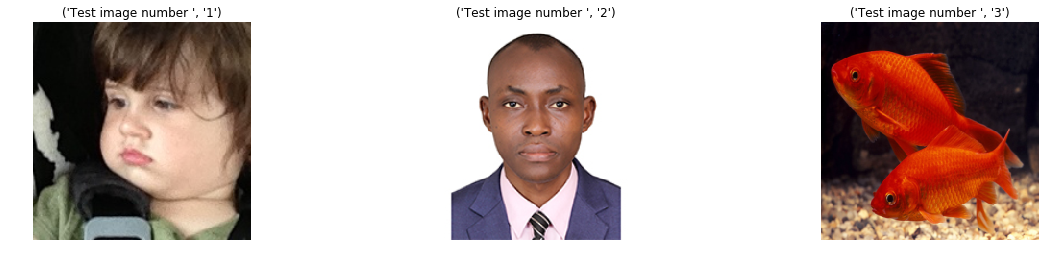

In [19]:
print("\n==============> WITH a non-face image")
# Prediction on unsuitable image (several faces, or animals)
if int(PyVersion[0])==2:
    data_dir_other = '/notebooks/Fish.JPEG'
elif int(PyVersion[0])==3:
    data_dir_other = 'C:\\Users\\Jean-Claude KOUASSI\\tensorflow-udacity\\Fish.JPEG'

# Reshape for the plot function 
other_image = plt.imread(data_dir_other)
other_image = imresize(other_image, (227, 227))
images_to_plot.append(other_image)

# Reshape for the prediction model
other_image = other_image[np.newaxis]
print("other_image shape : ", other_image.shape)
print("Label Prediction with another image: ", tflearn_improved_model.predict(other_image))
print("True Label Value : Here we have a picture of fishes")

print("len images_to_plot :", len(images_to_plot))

for elt in images_to_plot:
    print("Images shapes for plot :")
    print(elt.shape) 

fig, axs = plt.subplots(1, len(images_to_plot), figsize=(20, 4))
for i, ax_i in enumerate(axs):
    NewTitle = "Test image number ", str(i+1)
    ax_i.imshow(images_to_plot[i])
    ax_i.set_title(NewTitle)
    ax_i.grid('off')
    ax_i.axis('off')
    
print("\n ************ END Improved Model Prediction with TFLearn **************  \n")

<a name="Improvement_Tensorflow"></a>
### II.4.2- With Tensorflow

**The improved model**

In [20]:
print("\n ************ START Build Improved Artificial neural network Model with Tensorflow **************  \n")

from tensorflow.contrib.keras.python.keras.layers.core import *
from tensorflow.contrib.keras.python.keras.models import Sequential
from tensorflow.contrib.keras.python.keras.models import Model
from tensorflow.contrib.keras.python.keras.regularizers import l2


tf_improved_model = Sequential()
tf_improved_model.add(Dense(64, activation='relu', input_shape=(154587,)))
tf_improved_model.add(Dense(32, activation='relu', kernel_regularizer=l2(l=0.01)))
tf_improved_model.add(Dense(32, activation='relu', kernel_regularizer=l2(l=0.01)))
tf_improved_model.add(Dense(16, activation='relu', kernel_regularizer=l2(l=0.01)))
tf_improved_model.add(Dropout(0.8))
tf_improved_model.add(Dense(16, activation='relu', kernel_regularizer=l2(l=0.01)))
tf_improved_model.add(Dropout(0.8))
tf_improved_model.add(Dense(10, activation='softmax', kernel_regularizer=l2(l=0.01)))


tf_improved_model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Reshape it to map the content to the rest of the process
X_train = np.array(X_train)
X_train = np.reshape(X_train, (X_train.shape[0], 154587))
y_train = np.array(y_train)
print(y_train.shape)
y_train_new = y_train.copy()
print(y_train_new.shape)

# starts training
history = tf_improved_model.fit(X_train, y_train_new, validation_split=0.1, epochs=20, batch_size=16, verbose=0)  


print("\n ************ END Build Improved Artificial neural network Model with Tensorflow **************  \n")


 ************ START Build Improved Artificial neural network Model with Tensorflow **************  

(335, 10)
(335, 10)

 ************ END Build Improved Artificial neural network Model with Tensorflow **************  



In [21]:
# USEFUL INFORMATION FOR TUNING

# +++++++++++++++++++++++++++++++++++++++++++++++++++++
# model.add(Dropout(0.5))
# tf.contrib.keras.layers.add(inputs, **kwargs)

# +++++++++++++++++++++++++++++++++++++++++++++++++++++
# Dropout: A Simple Way to Prevent Neural Networks from Overfitting
# http://www.cs.toronto.edu/~rsalakhu/papers/srivastava14a.pdf
# keras.layers.core.Dropout(rate, noise_shape=None, seed=None)



# +++++++++++++++++++++++++++++++++++++++++++++++++++++
# keras.layers.core.Dense(units, activation=None, use_bias=True, kernel_initializer='glorot_uniform', bias_initializer='zeros', 
#                        kernel_regularizer=None, bias_regularizer=None, activity_regularizer=None, kernel_constraint=None, 
#                        bias_constraint=None)



# +++++++++++++++++++++++++++++++++++++++++++++++++++++
# compile(self, optimizer, loss, metrics=None, loss_weights=None, sample_weight_mode=None)

# +++++++++++++++++++++++++++++++++++++++++++++++++++++
#fit(self, x=None, y=None, batch_size=32, epochs=1, verbose=1, callbacks=None, validation_split=0.0, 
#    validation_data=None, shuffle=True, class_weight=None, sample_weight=None, initial_epoch=0)

In [22]:
### MODEL BACKUP
filepath = 'output/improved.model.tensorflow.onehot'
tf.contrib.keras.models.save_model(tf_improved_model, filepath)

**Evaluation**

In [23]:
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], 154587))
y_test = np.array(y_test)

score = tf_improved_model.evaluate(X_test, y_test, batch_size=128)
print(score)

165/165 [==============================] - 9s     
[31.374597480080343, 0.060606061193076044]


['acc', 'loss', 'val_acc', 'val_loss']


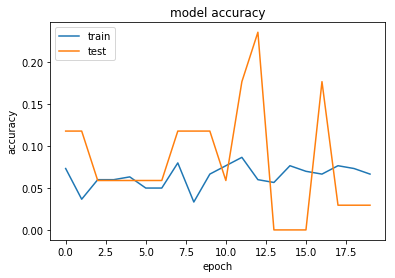

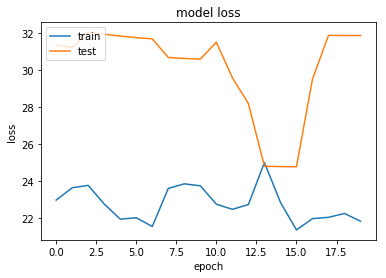

In [24]:
# Visualize training history
# http://machinelearningmastery.com/display-deep-learning-model-training-history-in-keras/
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

**Predictions**

In [25]:
print("\n\n ************ START Improved Model Prediction  with Tensorflow **************  \n")

### With images from the dataset

print(X_test.shape)

Label = tf_improved_model.predict(np.reshape(X_test[0], (1, 154587)))

print("Label Prediction : ", Label)
print("True Label Value : ", y_test[0])



 ************ START Improved Model Prediction  with Tensorflow **************  

(165, 154587)
Label Prediction :  [[ 0.  0.  0.  0.  0.  0.  1.  0.  0.  0.]]
True Label Value :  [ 1.  0.  0.  0.  0.  0.  0.  0.  0.  1.]


In [26]:
### With other face images

print("Before reshape : ", jc_image.shape)
# So let's remove the Alpha channel on the blended image
# https://github.com/davisking/dlib/issues/128
jc_image = jc_image[:, :, :, :3]
print("After reshape : ", jc_image.shape)
score = tf_improved_model.predict(np.reshape(jc_image, (1, 154587)))
print("Prediction score : ", score)
print("True Label Value : [[0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0]]")

Before reshape :  (1, 227, 227, 3)
After reshape :  (1, 227, 227, 3)
Prediction score :  [[ 0.  0.  0.  0.  0.  0.  1.  0.  0.  0.]]
True Label Value : [[0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0]]


In [27]:
### With non-faces images

print(other_image.shape)

score = tf_improved_model.predict(np.reshape(other_image, (1, 154587)))
print("Prediction score : ", score)
print("True Label Value : Here we have a picture of fishes")

print("\n\n ************ END Improved Model Prediction with Tensorflow **************  \n")

(1, 227, 227, 3)
Prediction score :  [[ 0.  0.  0.  0.  0.  0.  1.  0.  0.  0.]]
True Label Value : Here we have a picture of fishes


 ************ END Improved Model Prediction with Tensorflow **************  



**REUSE SAVED MODELS**

In [ ]:
# Before the fit to train on, or use alone and start to predict on.
### 1- TFLEARN
# tflearn_improved_model = tflearn_improved_model.load('/output/improved.model.tflearn')

### 2- TENSORFLOW
#filepath = 'output/improved.model.tensorflow'
#tf_improved_model = tf.contrib.keras.models.load_model(filepath)


<a name="Age_Gender_Application"></a>
# III- Age and Gender Application (Optional)
      - Resources for Desktop, Mobile and Web Application


***Several possibilities to run the App on videos:***
- Using the [MoviePy](http://zulko.github.io/moviepy/index.html) Python module for video editing. It works on Windows, Mac, and Linux, with Python 2 or Python 3.
- [Python Live Video Streaming Example](http://www.chioka.in/python-live-video-streaming-example/)
- Using [scikit-video](https://github.com/aizvorski/scikit-video), a Video processing algorithms, including I/O, quality metrics, temporal filtering, motion/object detection, motion estimation...
- Using the [Continuous online video classification with TensorFlow](https://medium.com/@harvitronix/continuous-online-video-classification-with-tensorflow-inception-and-a-raspberry-pi-785c8b1e13e1) post on medium. The [Part2](https://medium.com/@harvitronix/continuous-video-classification-with-tensorflow-inception-and-recurrent-nets-250ba9ff6b85) includes examples on how to reuse TFLearn saved models.
- Applying the acgGAN function to **openCV** functions as in the [Udacity-Self-Driving-Car-Preview](https://github.com/Kjeanclaude/Udacity-SDC-Preview); look at the video part.


***Now on Mobile:***
<font color='red'><br/>There is not enough documentation for this task as I explained in the introduction. <br/>But we could find for Tensorflow some recents posts it is worth to try (almost all of them posted in March 2017).<br/>**Other methods are welcome, mostly universal methods (crossplatform supporting several Deep Learning frameworks).**</font>

- [Deploying a TensorFlow model to Android](https://chatbotslife.com/deploying-a-tensorflow-model-to-android-69d04d1b0cba)
- [Creating Custom Model For Android Using TensorFlow](https://blog.mindorks.com/creating-custom-model-for-android-using-tensorflow-3f963d270bfb)
- Tensorflow codelabs:
  - [TensorFlow for Poets 1](https://codelabs.developers.google.com/codelabs/tensorflow-for-poets/index.html#0)
  - [TensorFlow for Poets 2: Optimize for Mobile](https://codelabs.developers.google.com/codelabs/tensorflow-for-poets-2/#0)
  

***Below the intending functionalities of the App:***
- Select a picture or take a video with your phone
- The App give the gender and age of the picture (For instance, "It seems that we have a 30 years old Woman in this picture")


<a name="Discussion"></a>
# IV- Discussion

### Improvement
We will try to increase the quality of images as we can (It is the challenge the original paper tried to overcome).
We should try to provide result closer to below (even if we could not have the same accuracy because of amount of data and class of ages available with platform such as Microsoft, Facebook, etc.).
- For the age and gender prediction on unseen images : https://how-old.net/ (Microsoft). It is very accurate.    
    
    
### Framework limitation
Tools we used to train and evaluate the dataset could have an influence on the result. For example, the use of a DNNClassifier or a Keras on Tensorflow has different requirements. The dataset structure should be a dictionary for one, and a list for another. So it would be interesting to evaluate all the possibilities and compare how accurate improvement there is for each use case.

### Future work

- it would be worth to apply the same technic on other types of ANN such as GAN, as it is a recent field always in exploration, ***mainly the Wasserstein GAN*** which produces accurate results.
- propose an ***universal and easy method*** for deployment of notebook implementations on a Mobile App

<a name="conclusion"></a>
# CONCLUSION

We are thankful to Udacity for this effective Machine Learning Engineer Program. We have learned a lot of things and ready to go and apply them to professionnal and personal objectives projects.

We also thank the authors of the research paper which inspired our work, [Age and gender classification using convolutional neural networks](http://www.openu.ac.il/home/hassner/projects/cnn_agegender/CNN_AgeGenderEstimation.pdf). Even if they have different objectives, the provided dataset have been very helpful to perform this work. While they used CNN on separate prediction of gender and age, we used FCNs for a pixel-wise precision for both age and gender prediction on the same image, in a unique process.

This work could be used as a tutorial for anyone interesting in this field.

The main contribution had been:
- Provide simple and easy to use tools for dataset preprocessing, **considering different Machine Learning Frameworks requirements**.
- Assemble the prediction process in one step for both predictions, age and gender.
- Turning the implementation in video and mobile application
- Relate the performance values (to be done .......)

This capstone project allowed us to use tools provided by the MLND (Machine Learning Engineer Nanodegree Program) for the Machine Learning Process, especially :
    - Supervised Classification
    - Data Exploration
        --> Feature Observation : Identify and build feature and target columns from the dataset.
        Using labeled images (the Adience benchmark, we have been able to recreate a new Unified dataset 
        of new features and labels to fit our model)
    - Performance Metric (Loss and Accuracy Scores)
    - Shuffle and Split Data : Training and Testing Data Split (sklearn train_test_split tool)
    - Training Models (TFLearn and Tensorflow Keras models)
    - Model Evaluation and Validation (Loss and Accuracy)
    - Analyzing Model Performance (Tensorboard and Training history Visualization)
        --> Learning Curves
        --> Complexity Curves
    - Making Predictions (of correct labels)
    - Model Optimization - Model Tuning (optimizer, activation, loss and regularization functions, number of epoch, etc. )
    - Training computational cost (Big-O complexities of common algorithms used in Computer Science)


One of the Udacity statement is about the lifelong learning; so after this MLND, as we are involved in Cognitive Computing Research, it will be a solid basis to continue training in the field and reach the goal of Senior Cognitive Computing Researcher.

<font color='red'><br/>So, we are pleased to share this work with you. As it is said that there is no perfect human work, we are open to comment or suggestion. <br/>Any positive or negative feedback are welcome.<br/>Thank you !. <br/>==> <a href="https://github.com/Kjeanclaude">K. Jean-Claude</a><br/></font>